## Data Cleaning - French Baby Names

The goal of this excercise is to use common functions for data cleaning.

### 1. Import libraries

In [109]:
import pandas as pd
import numpy as np
import matplotlib

### 2. Read the file nat2018.csv as baby_names and show the head of the data frame

Hint: The separator is a semi-colon " ; "

In [3]:
baby_names = pd.read_csv("nat2018.csv", sep=";")

In [4]:
baby_names.head()

,sexe,preusuel,annais,nombre
0,1,A,1980,3
1,1,A,1998,3
2,1,A,XXXX,21
3,1,AADAM,2009,4
4,1,AADAM,2014,3


The columns are in French, so let's translate them to english to understand the data better.

## 3. Rename column names

The column "sexe" refers to the gender of the baby, "preusuel" is the name given, "annais" is the year the baby was born, and "nombre" is the number of people registered with the same name.
We will rename the columns as following:
- gender
- name
- year
- count

In [5]:
baby_names.columns = ["gender", "name", "year", "count"]

In [6]:
baby_names.head()

,gender,name,year,count
0,1,A,1980,3
1,1,A,1998,3
2,1,A,XXXX,21
3,1,AADAM,2009,4
4,1,AADAM,2014,3


Alternatively, rename column names with an explicit method

In [7]:
translations = {"sexe": "gender",
                "preusuel": "name",
                "annais": "year",
                "nombre": "count"}

In [8]:
baby_names.rename(translations, axis=1) # rename along axis 1 (columns)

,gender,name,year,count
0,1,A,1980,3
1,1,A,1998,3
2,1,A,XXXX,21
3,1,AADAM,2009,4
4,1,AADAM,2014,3
...,...,...,...,...
636469,2,ÖZLEM,2013,3
636470,2,ÖZLEM,2014,5
636471,2,ÖZLEM,2015,3
636472,2,ÖZLEM,2016,3


In [9]:
baby_names = baby_names.rename(columns=translations)

## 4. Check for null values

First, let's look at the length of our data using the shape variable.

In [10]:
baby_names.shape

(636474, 4)

We have 636,474 rows and 4 columns. Now, using the isnull() function with the sum() function, let's look at how many values are null.

In [11]:
baby_names.isnull().sum()

gender    0
name      3
year      0
count     0
dtype: int64

In [12]:
baby_names.head(10)

,gender,name,year,count
0,1,A,1980,3
1,1,A,1998,3
2,1,A,XXXX,21
3,1,AADAM,2009,4
4,1,AADAM,2014,3
5,1,AADAM,2016,4
6,1,AADAM,2017,4
7,1,AADAM,2018,3
8,1,AADAM,XXXX,9
9,1,AADEL,1976,5


Retrieve the rows from `baby_names` that have missing names.

---

In [13]:
df = pd.DataFrame([{"name": "nana",
                    "age": 19,
                    "color": "red"},
                   {"name": "bubu",
                    "age": 93,
                    "color": "pink"},
                   {"name": "dede",
                    "age": 29,
                    "color": "blue"},
                   {"name": "kiki",
                    "age": 54,
                    "color": "grey"}])
df

,name,age,color
0,nana,19,red
1,bubu,93,pink
2,dede,29,blue
3,kiki,54,grey


In [14]:
df["color"] == "pink"

0    False
1     True
2    False
3    False
Name: color, dtype: bool

In [15]:
df.loc[[False, True, False, False]]

,name,age,color
1,bubu,93,pink


In [16]:
df.loc[df["color"] == "pink"]

,name,age,color
1,bubu,93,pink


In [17]:
df.loc[df["color"] == "pink", ["name", "age"]]

,name,age
1,bubu,93


---

In [18]:
baby_names.isnull()

,gender,name,year,count
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
636469,False,False,False,False
636470,False,False,False,False
636471,False,False,False,False
636472,False,False,False,False


In [19]:
baby_names["name"].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
636469    False
636470    False
636471    False
636472    False
636473    False
Name: name, Length: 636474, dtype: bool

In [20]:
baby_names.loc[baby_names["name"].isnull()]

,gender,name,year,count
536476,2,NaN,1982,3
536477,2,NaN,2003,3
536478,2,NaN,XXXX,25


In [21]:
baby_names = baby_names.dropna().reset_index(drop=True)

Just three names are null values, so we can remove them from the list. Don't forget to reset the index.

## 5. Verify the data types

In [22]:
baby_names.dtypes

gender     int64
name      object
year      object
count      int64
dtype: object

- Gender and Count are set as integers, which is correct
- Name is an object
- Year should be an integer, but is set as an object because some values are "XXXX"

Let's look at how many rows have "XXXX" set as year.

In [23]:
baby_names.loc[baby_names["year"] == "XXXX"].shape

(35012, 4)

35,012 rows out of the 636,471 have "XXXX" as year. We will remove these rows, since they represent the 9.6% of the data and we will need the year for further analysis.

In [24]:
baby_names = baby_names.loc[baby_names["year"] != "XXXX"].reset_index(drop=True)

Lastly, let's change the year column to integer.

In [25]:
baby_names["year"] = baby_names["year"].astype(int)

In [26]:
baby_names.dtypes

gender     int64
name      object
year       int64
count      int64
dtype: object

We will also change gender to string, 1 being M and 2 being F, using np.where()

In [27]:
baby_names["gender"].value_counts()

2    327476
1    273983
Name: gender, dtype: int64

In [28]:
baby_names["gender"]

0         1
1         1
2         1
3         1
4         1
         ..
601454    2
601455    2
601456    2
601457    2
601458    2
Name: gender, Length: 601459, dtype: int64

In [29]:
# np.where(condition, then, else)
np.where(baby_names["gender"] == 1, "M", "F")

array(['M', 'M', 'M', ..., 'F', 'F', 'F'], dtype='<U1')

In [30]:
baby_names = baby_names.assign(gender=np.where(baby_names["gender"] == 1, "M", "F"))

In [31]:
baby_names

,gender,name,year,count
0,M,A,1980,3
1,M,A,1998,3
2,M,AADAM,2009,4
3,M,AADAM,2014,3
4,M,AADAM,2016,4
...,...,...,...,...
601454,F,ÖZLEM,2012,6
601455,F,ÖZLEM,2013,3
601456,F,ÖZLEM,2014,5
601457,F,ÖZLEM,2015,3


## 6. How many unique names does our list have?

Using nunique() for the "name" column, look at how many unique names out data has.

In [32]:
#this code groups by name and finds the unique values of "count"
baby_names.groupby("name")["count"].unique()

name
A                                              [3]
AADAM                                       [4, 3]
AADEL                                    [5, 3, 4]
AADIL                [4, 6, 8, 9, 11, 12, 3, 7, 5]
AAHIL                                    [5, 4, 6]
                           ...                    
ÖMER     [3, 4, 5, 13, 23, 29, 35, 39, 56, 59, 64]
ÖZGE                                     [4, 3, 5]
ÖZGÜR                                          [3]
ÖZKAN                                          [3]
ÖZLEM                           [3, 7, 4, 8, 6, 5]
Name: count, Length: 31708, dtype: object

In [33]:
baby_names["name"].nunique()

31708

We have 31,708 unique names. Now using value_counts() for the "name" column, let's look at how many babies have the same name.

In [34]:
baby_names["name"].value_counts()

_PRENOMS_RARES    238
ALIX              238
ANGE              238
CAMILLE           238
DOMINIQUE         235
                 ... 
BAZOUMANA           1
EWELINA             1
MYSON               1
ATLAN               1
LILAN               1
Name: name, Length: 31708, dtype: int64

There are 238 values with the name "\_PRENOMS_RARES", which translates to rare names, so we will remove this names from the data.

In [35]:
#renamed in case we want to access old data
baby_names_clean_names = baby_names.loc[baby_names["name"]!="_PRENOMS_RARES"].reset_index(drop=True).copy()

In [36]:
baby_names_clean_names.head(5)

,gender,name,year,count
0,M,A,1980,3
1,M,A,1998,3
2,M,AADAM,2009,4
3,M,AADAM,2014,3
4,M,AADAM,2016,4


In [37]:
#gives a visual confirmation that rows were removed
baby_names_clean_names["name"].value_counts()

ALIX             238
ANGE             238
CAMILLE          238
DOMINIQUE        235
CLAUDE           232
                ... 
HÉDIA              1
THYLER             1
JAI                1
VENERA             1
MOHAMED-AKRAM      1
Name: name, Length: 31707, dtype: int64

## 7. Get the top 10 most common baby names
Using the value counts for the "name" column, sort the values in descending order and save the top 10 in a variable called top_names.

In [38]:
top_names = baby_names_clean_names["name"].value_counts().head(10)

In [39]:
top_names

ALIX         238
ANGE         238
CAMILLE      238
DOMINIQUE    235
CLAUDE       232
HYACINTHE    228
MAXIME       226
MARIE        211
GABY         206
CYRILLE      206
Name: name, dtype: int64

#### i. Let's get a separate list of top names for males and for females

Group by gender using count as an aggregate function to see how many values we have of each.

In [40]:
(baby_names_clean_names.groupby(by=["gender", "name"])
                         .agg({"count":"sum"})
                         .sort_values(by=["gender","count"], ascending=False))

count
gender name              
M      JEAN       1916584
       PIERRE      890973
       MICHEL      820274
       ANDRÉ       711933
       PHILIPPE    538373
...                   ...
F      ZOHOUR           3
       ZOPHIE           3
       ZOUBEIDA         3
       ZUBIDA           3
       ÉLIZABETH        3

[33680 rows x 1 columns]

In [41]:
baby_names_clean_names.loc[baby_names_clean_names["gender"]=="M"]

,gender,name,year,count
0,M,A,1980,3
1,M,A,1998,3
2,M,AADAM,2009,4
3,M,AADAM,2014,3
4,M,AADAM,2016,4
...,...,...,...,...
273859,M,ÖZGÜR,2014,3
273860,M,ÖZGÜR,2016,3
273861,M,ÖZKAN,2014,3
273862,M,ÖZKAN,2017,3


Now, create a data frame where gender is M named male_names and another for female_names. Compare the length of each data frame with the previous data frame in order to be sure that we have the same values.

In [42]:
male_names = baby_names_clean_names.loc[baby_names_clean_names["gender"]=="M"].copy()

In [43]:
female_names = baby_names_clean_names.loc[baby_names_clean_names["gender"]=="F"].copy()

In [44]:
male_names.head()

,gender,name,year,count
0,M,A,1980,3
1,M,A,1998,3
2,M,AADAM,2009,4
3,M,AADAM,2014,3
4,M,AADAM,2016,4


In [45]:
female_names.head()

,gender,name,year,count
273864,F,AALIA,2014,3
273865,F,AALIA,2015,3
273866,F,AALIA,2017,7
273867,F,AALIA,2018,10
273868,F,AALIYA,2002,7


#### ii. Get the top 10 names for males and for females

In [46]:
#this tells us how many times the name appears in the dataframe, but does not aggregate the count of the names
#we need to use a groupby
male_names["name"].value_counts().sort_values(ascending=False)

JOACHIM        119
CONSTANTIN     119
AURÉLIEN       119
JULES          119
JACOB          119
              ... 
JONEL            1
JEAN-CÉDRIC      1
FLORENCE         1
CLÉRY            1
HAMMAD           1
Name: name, Length: 15304, dtype: int64

In [47]:
(male_names
 .groupby(by="name")
 .agg({"count":"sum"})
 .sort_values(by="count", ascending=False).head(10))

,count
name,
JEAN,1916584
PIERRE,890973
MICHEL,820274
ANDRÉ,711933
PHILIPPE,538373
LOUIS,517608
RENÉ,516337
ALAIN,506865
JACQUES,482669


In [66]:
df = (female_names
      .groupby("name", as_index=False)
      .agg({"count": "sum"})
      .sort_values(by="count", ascending=False)
      .head(10))

In [69]:
df["name"].to_list()

['MARIE',
 'JEANNE',
 'FRANÇOISE',
 'MONIQUE',
 'CATHERINE',
 'NATHALIE',
 'ISABELLE',
 'JACQUELINE',
 'SYLVIE',
 'ANNE']

In [74]:
(female_names
 .groupby("name", as_index=False)
 .agg({"count": "sum"})
 .sort_values(by="count", ascending=False)
 .head(10)
 ["name"]
 .to_list())

['MARIE',
 'JEANNE',
 'FRANÇOISE',
 'MONIQUE',
 'CATHERINE',
 'NATHALIE',
 'ISABELLE',
 'JACQUELINE',
 'SYLVIE',
 'ANNE']

## Bonus

### 1. Create a data frame containing babies born from 2010 onwards

In [78]:
after_2010 = baby_names.loc[baby_names["year"] >= 2010]

### 2. Get the top 10 most common names from the data frame created.

In [105]:
(after_2010
 .groupby("name")
 .agg({"count": "sum"})
 .sort_values("count", ascending=False)
 .head(10))

,count
name,
_PRENOMS_RARES,457308
LUCAS,47534
GABRIEL,47327
EMMA,45107
LOUIS,42922
NATHAN,41135
JULES,40017
HUGO,39949
JADE,39032


In [94]:
(after_2010
 .groupby("name")
 .agg({"count": "sum"})
 .sort_values("count", ascending=False)
 .head(10)
 .index
 .to_list())

['_PRENOMS_RARES',
 'LUCAS',
 'GABRIEL',
 'EMMA',
 'LOUIS',
 'NATHAN',
 'JULES',
 'HUGO',
 'JADE',
 'LOUISE']

### 3.  From the `baby_names` dataframe, calculate the registered babies for each year

In [108]:
annual_babies = (baby_names
                 .groupby("year")
                 .agg({"count": "sum"}))

In [119]:
annual_babies

,count
year,
1900,415032
1901,453432
1902,465774
1903,468792
1904,478935
...,...
2014,798538
2015,777208
2016,761638


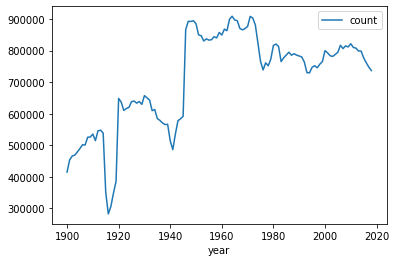

In [117]:
annual_babies.plot();

### 4. From the `baby_names` dataframe, calculate the registered babies for each gender and each year

In [127]:
(baby_names
 .groupby(["year", "gender"])
 .agg({"count": "sum"}))

count
year gender        
1900 F       237650
     M       177382
1901 F       257492
     M       195940
1902 F       261438
...             ...
2016 M       390466
2017 F       364488
     M       383132
2018 F       358711
     M       378021

[238 rows x 1 columns]

### 5. For each year, what are the top 5 names?

In [129]:
baby_names.head()

,gender,name,year,count
0,M,A,1980,3
1,M,A,1998,3
2,M,AADAM,2009,4
3,M,AADAM,2014,3
4,M,AADAM,2016,4


In [137]:
df = (baby_names
      .groupby(["year", "name"], as_index=False)
      .agg({"count": "sum"}))

In [159]:
df = df.sort_values(["year", "count"], ascending=[True, False])

In [161]:
(df
 .groupby("year", as_index=False)
 .head(5)).head(20)

,year,name,count
1037,1900,MARIE,49778
838,1900,JEAN,14104
854,1900,JEANNE,13981
977,1900,LOUIS,9054
1028,1900,MARGUERITE,8058
2642,1901,MARIE,53197
2441,1901,JEAN,15640
2458,1901,JEANNE,14963
2578,1901,LOUIS,10066
2636,1901,MARGUERITE,9015


In [165]:
# 1. calculate the sum of babies for each year and name
(baby_names
 .groupby(["year", "name"], as_index=False)
 .agg({"count": "sum"})
# 2. sort by year ascending first, and then by count descending
 .sort_values(["year", "count"], ascending=[True, False])
# 3. for each year, only return the first 5 rows
 .groupby("year")
 .head(5))

,year,name,count
1037,1900,MARIE,49778
838,1900,JEAN,14104
854,1900,JEANNE,13981
977,1900,LOUIS,9054
1028,1900,MARGUERITE,8058
...,...,...,...
577559,2018,_PRENOMS_RARES,53978
568867,2018,GABRIEL,5422
574863,2018,RAPHAËL,4591
572217,2018,LÉO,4456


In [166]:
(baby_names
 .groupby(["year", "name"], as_index=False)
 .agg({"count": "sum"})
 .sort_values(["year", "count"], ascending=[True, False])
 .groupby("year")
 .head(5))

,year,name,count
1037,1900,MARIE,49778
838,1900,JEAN,14104
854,1900,JEANNE,13981
977,1900,LOUIS,9054
1028,1900,MARGUERITE,8058
...,...,...,...
577559,2018,_PRENOMS_RARES,53978
568867,2018,GABRIEL,5422
574863,2018,RAPHAËL,4591
572217,2018,LÉO,4456


### 6. For each year and gender, what are the top 5 names?

### 7. What's the ratio of female babies for each year?

### 8. Identify all unique unisex names